## Estimadores ML con 20 variables

In [1]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.6 (default, Dec 30 2019, 19:38:36) 
[Clang 10.0.0 (clang-1000.11.45.5)]
scipy: 1.4.1
numpy: 1.18.1
matplotlib: 3.1.3
pandas: 1.0.1
sklearn: 0.22.1


In [19]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)


## Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils


## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

## Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [3]:
# Cargamos el dataset anterior
dataset = pd.read_csv("df1_eda.csv")
dataset

idClient  Score CountryLocation  Gender  Age  Tenure  Games Balance  \
0            1    619          France       1   42       2           0.00   
1            2    608           Spain       1   41       1       83807.86   
2            3    502          France       1   42       8      159660.80   
3            4    699          France       1   39       1           0.00   
4            5    850           Spain       1   43       2      125510.82   
...        ...    ...             ...     ...  ...     ...            ...   
9995      9996    771          France       0   39       5           0.00   
9996      9997    516          France       0   35      10       57369.61   
9997      9998    709          France       1   36       7           0.00   
9998      9999    772         Germany       0   42       3       75075.31   
9999     10000    792          France       1   28       4      130142.79   

      NumOfProducts  HasPremiumAccess  IsActiveMember  Cumulative score  \
0                 1                 1               1         101348.88   
1                 1                 0               1         112542.58   
2                 3                 1               0         113931.57   
3                 2                 0               0          93826.63   
4                 1                 1               1          79084.10   
...             ...               ...             ...               ...   
9995              2                 1               0          96270.64   
9996              1                 1               1         101699.77   
9997              1                 0               1          42085.58   
9998              2                 1               0          92888.52   
9999              1                 1               0          38190.78   

      Churn ScoreGroup     AgeGroup GamesBalanceGroup CumScoreGroup  
0         1       GOLD  Young Adult               LOW        Expert  
1         0       GOLD  Young Adult            MEDIUM        Expert  
2         1     SILVER  Young Adult      INTERMEDIATE        Expert  
3         0       GOLD  Young Adult               LOW  Intermediate  
4         0   PLATINUM  Young Adult      INTERMEDIATE  Intermediate  
...     ...        ...          ...               ...           ...  
9995      0   PLATINUM  Young Adult               LOW  Intermediate  
9996      0     SILVER      Student               LOW        Expert  
9997      1       GOLD  Young Adult               LOW        Rookie  
9998      1   PLATINUM  Young Adult            MEDIUM  Intermediate  
9999      0   PLATINUM      Student      INTERMEDIATE        Rookie  

[10000 rows x 16 columns]

## Procesado
https://scikit-learn.org/stable/modules/preprocessing.html

In [4]:
# Seleccionamos las variables numéricas
num_features = dataset.select_dtypes(include=[np.number])
num_features.dtypes

idClient              int64
Score                 int64
Gender                int64
Age                   int64
Tenure                int64
Games Balance       float64
NumOfProducts         int64
HasPremiumAccess      int64
IsActiveMember        int64
Cumulative score    float64
Churn                 int64
dtype: object

In [5]:
from sklearn import preprocessing

In [6]:
columnasX = ['Score', 'Age','Tenure',
           'Games Balance','NumOfProducts',
           'Cumulative score']

In [7]:
# Data normalization
normalized_X = preprocessing.normalize(dataset[columnasX])
normalized_X

array([[6.10750116e-03, 4.14402340e-04, 1.97334448e-05, 0.00000000e+00,
        9.86672238e-06, 9.99981263e-01],
       [4.33292479e-03, 2.92187362e-04, 7.12652104e-06, 5.97258477e-01,
        7.12652104e-06, 8.02037064e-01],
       [2.55935218e-03, 2.14129067e-04, 4.07864889e-05, 8.14000431e-01,
        1.52949333e-05, 5.80858589e-01],
       ...,
       [1.68442289e-02, 8.55278194e-04, 1.66304093e-04, 0.00000000e+00,
        2.37577276e-05, 9.99857746e-01],
       [6.46366317e-03, 3.51650069e-04, 2.51178621e-05, 6.28577094e-01,
        1.67452414e-05, 7.77720344e-01],
       [5.83928708e-03, 2.06439442e-04, 2.94913489e-05, 9.59521607e-01,
        7.37283723e-06, 2.81574404e-01]])

In [8]:
# Data Standardization
standarization_X = preprocessing.scale(dataset[columnasX])
standarization_X

array([[-0.32622142,  0.29351742, -1.04175968, -1.22584767, -0.91158349,
         0.02188649],
       [-0.44003595,  0.19816383, -1.38753759,  0.11735002, -0.91158349,
         0.21653375],
       [-1.53679418,  0.29351742,  1.03290776,  1.33305335,  2.52705662,
         0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, -1.22584767, -0.91158349,
        -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, -0.02260751,  0.80773656,
        -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386,  0.85996499, -0.91158349,
        -1.07636976]])

In [9]:
for stand in columnasX:
    dataset[stand] = preprocessing.scale(dataset[stand], axis=0,
                       with_mean=True,
                       with_std=True)

In [10]:
dataset.head(10)

idClient     Score CountryLocation  Gender       Age    Tenure  \
0         1 -0.326221          France       1  0.293517 -1.041760   
1         2 -0.440036           Spain       1  0.198164 -1.387538   
2         3 -1.536794          France       1  0.293517  1.032908   
3         4  0.501521          France       1  0.007457 -1.387538   
4         5  2.063884           Spain       1  0.388871 -1.041760   
5         6 -0.057205           Spain       0  0.484225  1.032908   
6         7  1.774174          France       0  1.056346  0.687130   
7         8 -2.840488         Germany       1 -0.946079 -0.350204   
8         9 -1.547141          France       0  0.484225 -0.350204   
9        10  0.346319          France       0 -1.136786 -1.041760   

   Games Balance  NumOfProducts  HasPremiumAccess  IsActiveMember  \
0      -1.225848      -0.911583                 1               1   
1       0.117350      -0.911583                 0               1   
2       1.333053       2.527057                 1               0   
3      -1.225848       0.807737                 0               0   
4       0.785728      -0.911583                 1               1   
5       0.597329       0.807737                 1               0   
6      -1.225848       0.807737                 1               1   
7       0.618019       4.246377                 1               0   
8       1.050820       0.807737                 0               1   
9       0.931463      -0.911583                 1               1   

   Cumulative score  Churn ScoreGroup     AgeGroup GamesBalanceGroup  \
0          0.021886      1       GOLD  Young Adult               LOW   
1          0.216534      0       GOLD  Young Adult            MEDIUM   
2          0.240687      1     SILVER  Young Adult      INTERMEDIATE   
3         -0.108918      0       GOLD  Young Adult               LOW   
4         -0.365276      0   PLATINUM  Young Adult      INTERMEDIATE   
5          0.863650      1       GOLD  Young Adult            MEDIUM   
6         -1.565487      0   PLATINUM        Adult               LOW   
7          0.334854      1     BRONCE      Student            MEDIUM   
8         -0.437329      0     SILVER  Young Adult      INTERMEDIATE   
9         -0.493230      0       GOLD      Student      INTERMEDIATE   

  CumScoreGroup  
0        Expert  
1        Expert  
2        Expert  
3  Intermediate  
4  Intermediate  
5   GrandMaster  
6   Entry-Level  
7        Expert  
8        Novice  
9        Novice

## Binarización

In [11]:
# Evaluamos las variables categoricas
cat_feature = dataset.dtypes == object

# Guardamos las variables categóricas en un array
cat_cols = dataset.columns[cat_feature].tolist()

# Binarizamos
dataset = pd.get_dummies(dataset, columns=cat_cols)

# Observaremos los resultados
dataset.head(10)

idClient     Score  Gender       Age    Tenure  Games Balance  \
0         1 -0.326221       1  0.293517 -1.041760      -1.225848   
1         2 -0.440036       1  0.198164 -1.387538       0.117350   
2         3 -1.536794       1  0.293517  1.032908       1.333053   
3         4  0.501521       1  0.007457 -1.387538      -1.225848   
4         5  2.063884       1  0.388871 -1.041760       0.785728   
5         6 -0.057205       0  0.484225  1.032908       0.597329   
6         7  1.774174       0  1.056346  0.687130      -1.225848   
7         8 -2.840488       1 -0.946079 -0.350204       0.618019   
8         9 -1.547141       0  0.484225 -0.350204       1.050820   
9        10  0.346319       0 -1.136786 -1.041760       0.931463   

   NumOfProducts  HasPremiumAccess  IsActiveMember  Cumulative score  ...  \
0      -0.911583                 1               1          0.021886  ...   
1      -0.911583                 0               1          0.216534  ...   
2       2.527057                 1               0          0.240687  ...   
3       0.807737                 0               0         -0.108918  ...   
4      -0.911583                 1               1         -0.365276  ...   
5       0.807737                 1               0          0.863650  ...   
6       0.807737                 1               1         -1.565487  ...   
7       4.246377                 1               0          0.334854  ...   
8       0.807737                 0               1         -0.437329  ...   
9      -0.911583                 1               1         -0.493230  ...   

   GamesBalanceGroup_LOW  GamesBalanceGroup_MEDIUM  CumScoreGroup_Commodoro  \
0                      1                         0                        0   
1                      0                         1                        0   
2                      0                         0                        0   
3                      1                         0                        0   
4                      0                         0                        0   
5                      0                         1                        0   
6                      1                         0                        0   
7                      0                         1                        0   
8                      0                         0                        0   
9                      0                         0                        0   

   CumScoreGroup_Entry-Level  CumScoreGroup_Expert  CumScoreGroup_GrandMaster  \
0                          0                     1                          0   
1                          0                     1                          0   
2                          0                     1                          0   
3                          0                     0                          0   
4                          0                     0                          0   
5                          0                     0                          1   
6                          1                     0                          0   
7                          0                     1                          0   
8                          0                     0                          0   
9                          0                     0                          0   

   CumScoreGroup_Intermediate  CumScoreGroup_Master  CumScoreGroup_Novice  \
0                           0                     0                     0   
1                           0                     0                     0   
2                           0                     0                     0   
3                           1                     0                     0   
4                           1                     0                     0   
5                           0                     0                     0   
6                           0                     0                     0   
7                           

In [12]:
dataset.columns.tolist()

['idClient',
 'Score',
 'Gender',
 'Age',
 'Tenure',
 'Games Balance',
 'NumOfProducts',
 'HasPremiumAccess',
 'IsActiveMember',
 'Cumulative score',
 'Churn',
 'CountryLocation_France',
 'CountryLocation_Germany',
 'CountryLocation_Spain',
 'ScoreGroup_BRONCE',
 'ScoreGroup_GOLD',
 'ScoreGroup_PLATINUM',
 'ScoreGroup_SILVER',
 'AgeGroup_Adult',
 'AgeGroup_Mid-Senior',
 'AgeGroup_Senior',
 'AgeGroup_Student',
 'AgeGroup_Teenager',
 'AgeGroup_Young Adult',
 'GamesBalanceGroup_HIGH',
 'GamesBalanceGroup_INTERMEDIATE',
 'GamesBalanceGroup_LOW',
 'GamesBalanceGroup_MEDIUM',
 'CumScoreGroup_Commodoro',
 'CumScoreGroup_Entry-Level',
 'CumScoreGroup_Expert',
 'CumScoreGroup_GrandMaster',
 'CumScoreGroup_Intermediate',
 'CumScoreGroup_Master',
 'CumScoreGroup_Novice',
 'CumScoreGroup_Rookie']

## Correlación

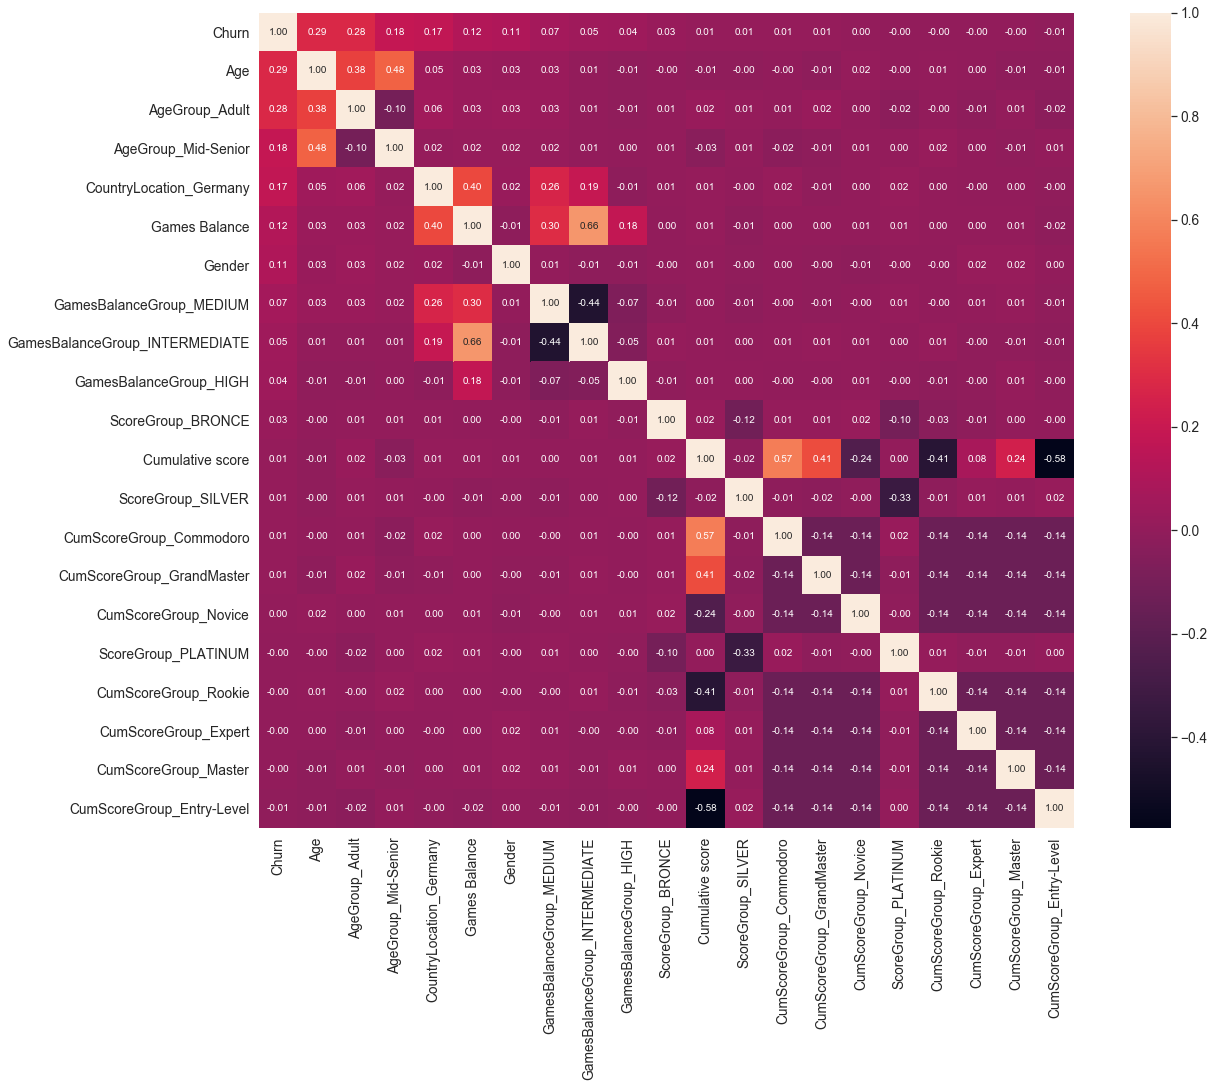

In [13]:
#churn correlation matrix
k = 21 #number of variables for heatmap
plt.figure(figsize=(20,15))
corrmat = dataset.corr()
# picking the top 20 correlated features
cols = corrmat.nlargest(k, 'Churn')['Churn'].index
cm = np.corrcoef(dataset[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Modelado

In [14]:
# Features 20 variables
cols 

Index(['Churn', 'Age', 'AgeGroup_Adult', 'AgeGroup_Mid-Senior',
       'CountryLocation_Germany', 'Games Balance', 'Gender',
       'GamesBalanceGroup_MEDIUM', 'GamesBalanceGroup_INTERMEDIATE',
       'GamesBalanceGroup_HIGH', 'ScoreGroup_BRONCE', 'Cumulative score',
       'ScoreGroup_SILVER', 'CumScoreGroup_Commodoro',
       'CumScoreGroup_GrandMaster', 'CumScoreGroup_Novice',
       'ScoreGroup_PLATINUM', 'CumScoreGroup_Rookie', 'CumScoreGroup_Expert',
       'CumScoreGroup_Master', 'CumScoreGroup_Entry-Level'],
      dtype='object')

In [15]:
X = dataset[cols]
X
##val = dataset['idClient']
X.drop(['Churn'], axis=1, inplace=True)

In [16]:
y = dataset['Churn']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Churn, Length: 10000, dtype: int64

In [17]:
# Train and Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [18]:
X_train

Age  AgeGroup_Adult  AgeGroup_Mid-Senior  CountryLocation_Germany  \
9254 -0.660018               0                    0                        0   
1561  0.293517               0                    0                        1   
1670 -1.422847               0                    0                        0   
6087 -1.136786               0                    0                        0   
6669  1.628468               0                    1                        0   
...        ...             ...                  ...                      ...   
5734  1.437761               1                    0                        0   
5191  1.819175               0                    1                        0   
5390 -0.087897               0                    0                        0   
860   0.388871               0                    0                        0   
7270  1.151700               1                    0                        1   

      Games Balance  Gender  GamesBalanceGroup_MEDIUM  \
9254      -1.225848       0                         0   
1561       0.691389       0                         1   
1670       0.613102       0                         1   
6087       0.948021       1                         0   
6669       1.052363       0                         0   
...             ...     ...                       ...   
5734      -0.108554       0                         1   
5191      -1.225848       1                         0   
5390      -1.225848       1                         0   
860        1.822949       0                         0   
7270       1.144727       0                         0   

      GamesBalanceGroup_INTERMEDIATE  GamesBalanceGroup_HIGH  \
9254                               0                       0   
1561                               0                       0   
1670                               0                       0   
6087                               1                       0   
6669                               1                       0   
...                              ...                     ...   
5734                               0                       0   
5191                               0                       0   
5390                               0                       0   
860                                0                       1   
7270                               1                       0   

      ScoreGroup_BRONCE  Cumulative score  ScoreGroup_SILVER  \
9254                  0          1.373784                  0   
1561                  0          1.667407                  0   
1670                  0         -0.246910                  1   
6087                  0          0.921446                  1   
6669                  0         -1.053812                  1   
...                 ...               ...                ...   
5734                  0         -0.534002                  0   
5191                  0         -1.728184                  0   
5390                  0         -0.136854                  0   
860                   0         -0.044902                  0   
7270                  0         -0.808747                  0   

      CumScoreGroup_Commodoro  CumScoreGroup_GrandMaster  \
9254                        1                          0   
1561                        1                          0   
1670                        0                          0   
6087                        0                          1   
6669                        0                          0   
...                       ...                        ...   
5734                        0                          0   
5191                        0                          0   
5390                        0                          0   
860                         0                          0   
7270                        0                          0   

      CumScoreGroup_Novice  ScoreGroup_PLATINUM  CumScoreGroup_Rookie  \
9254                     0       

In [ ]:
X_train.shape, y_train.shape

## Creación modelo NN Keras 1ra parte

In [20]:
# Carga de las variables
inputDim = len(X_train.columns.tolist()) # el total de las variables predictoras
layers = 60 # neuronas capas internas
epoch = 100 # ciclos del dataset
batchSize = 512 # trozos a separar el dataset
nSplits = 2 # cross-validation - combinación n train-test
verbose = 1 # nos muestra el modo debugging 0 none #1 progress bar #2 por linea
output = 1 # las clases de salida a predecir

In [21]:
# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(layers, input_dim=inputDim, activation='relu'))
    model.add(Dense(output, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [22]:
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=epoch, 
                            batch_size=batchSize, verbose=verbose)

In [23]:
# Cross validation
kfold = StratifiedKFold(n_splits=nSplits, 
                        shuffle=True)

In [24]:
results = cross_val_score(estimator, X_train, y_train, cv=kfold)

Epoch 1/100
4000/4000 [==============================] - 0s 88us/step - loss: 0.7599 - accuracy: 0.3780
Epoch 2/100
4000/4000 [==============================] - 0s 10us/step - loss: 0.6887 - accuracy: 0.5472
Epoch 3/100
4000/4000 [==============================] - 0s 9us/step - loss: 0.6317 - accuracy: 0.6873
Epoch 4/100
4000/4000 [==============================] - 0s 6us/step - loss: 0.5895 - accuracy: 0.7613
Epoch 5/100
4000/4000 [==============================] - 0s 17us/step - loss: 0.5584 - accuracy: 0.7857
Epoch 6/100
4000/4000 [==============================] - 0s 11us/step - loss: 0.5361 - accuracy: 0.7883
Epoch 7/100
4000/4000 [==============================] - 0s 18us/step - loss: 0.5195 - accuracy: 0.7908
Epoch 8/100
4000/4000 [==============================] - 0s 13us/step - loss: 0.5075 - accuracy: 0.7903
Epoch 9/100
4000/4000 [==============================] - 0s 6us/step - loss: 0.4975 - accuracy: 0.7910
Epoch 10/100
4000/4000 [==============================] - 0s 9us/st

4000/4000 [==============================] - 0s 6us/step - loss: 0.4078 - accuracy: 0.8267
Epoch 79/100
4000/4000 [==============================] - 0s 11us/step - loss: 0.4078 - accuracy: 0.8273
Epoch 80/100
4000/4000 [==============================] - 0s 12us/step - loss: 0.4074 - accuracy: 0.8270
Epoch 81/100
4000/4000 [==============================] - 0s 7us/step - loss: 0.4073 - accuracy: 0.8263
Epoch 82/100
4000/4000 [==============================] - 0s 12us/step - loss: 0.4072 - accuracy: 0.8263
Epoch 83/100
4000/4000 [==============================] - 0s 6us/step - loss: 0.4069 - accuracy: 0.8270
Epoch 84/100
4000/4000 [==============================] - 0s 13us/step - loss: 0.4068 - accuracy: 0.8273
Epoch 85/100
4000/4000 [==============================] - 0s 6us/step - loss: 0.4066 - accuracy: 0.8263
Epoch 86/100
4000/4000 [==============================] - 0s 6us/step - loss: 0.4065 - accuracy: 0.8273
Epoch 87/100
4000/4000 [==============================] - 0s 5us/step - l

4000/4000 [==============================] - 0s 6us/step - loss: 0.4182 - accuracy: 0.8213
Epoch 57/100
4000/4000 [==============================] - 0s 7us/step - loss: 0.4180 - accuracy: 0.8207
Epoch 58/100
4000/4000 [==============================] - 0s 12us/step - loss: 0.4178 - accuracy: 0.8205
Epoch 59/100
4000/4000 [==============================] - 0s 11us/step - loss: 0.4176 - accuracy: 0.8205
Epoch 60/100
4000/4000 [==============================] - 0s 6us/step - loss: 0.4174 - accuracy: 0.8210
Epoch 61/100
4000/4000 [==============================] - 0s 8us/step - loss: 0.4172 - accuracy: 0.8220
Epoch 62/100
4000/4000 [==============================] - 0s 7us/step - loss: 0.4170 - accuracy: 0.8210
Epoch 63/100
4000/4000 [==============================] - 0s 6us/step - loss: 0.4169 - accuracy: 0.8225
Epoch 64/100
4000/4000 [==============================] - 0s 19us/step - loss: 0.4166 - accuracy: 0.8220
Epoch 65/100
4000/4000 [==============================] - 0s 7us/step - lo

In [26]:
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 81.65% (0.15%)


## Versión mejorada del modelo NN 2da parte

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, make_union, Pipeline
# evaluate baseline model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=epoch, 
                            batch_size=batchSize, verbose=verbose)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=nSplits, 
                        shuffle=True)
results_2 = cross_val_score(pipeline, X_train, y_train, cv=kfold)

Epoch 1/100
4000/4000 [==============================] - 0s 94us/step - loss: 0.7343 - accuracy: 0.5080
Epoch 2/100
4000/4000 [==============================] - 0s 13us/step - loss: 0.6503 - accuracy: 0.6265
Epoch 3/100
4000/4000 [==============================] - 0s 6us/step - loss: 0.5862 - accuracy: 0.7038
Epoch 4/100
4000/4000 [==============================] - 0s 26us/step - loss: 0.5411 - accuracy: 0.7628
Epoch 5/100
4000/4000 [==============================] - 0s 6us/step - loss: 0.5087 - accuracy: 0.7875
Epoch 6/100
4000/4000 [==============================] - 0s 15us/step - loss: 0.4877 - accuracy: 0.7950
Epoch 7/100
4000/4000 [==============================] - 0s 12us/step - loss: 0.4726 - accuracy: 0.7980
Epoch 8/100
4000/4000 [==============================] - 0s 8us/step - loss: 0.4624 - accuracy: 0.8012
Epoch 9/100
4000/4000 [==============================] - 0s 10us/step - loss: 0.4554 - accuracy: 0.8027
Epoch 10/100
4000/4000 [==============================] - 0s 26us/s

4000/4000 [==============================] - 0s 18us/step - loss: 0.4140 - accuracy: 0.8220
Epoch 80/100
4000/4000 [==============================] - 0s 28us/step - loss: 0.4138 - accuracy: 0.8225
Epoch 81/100
4000/4000 [==============================] - 0s 5us/step - loss: 0.4135 - accuracy: 0.8235
Epoch 82/100
4000/4000 [==============================] - 0s 7us/step - loss: 0.4133 - accuracy: 0.8242
Epoch 83/100
4000/4000 [==============================] - 0s 15us/step - loss: 0.4130 - accuracy: 0.8238
Epoch 84/100
4000/4000 [==============================] - 0s 6us/step - loss: 0.4129 - accuracy: 0.8232
Epoch 85/100
4000/4000 [==============================] - 0s 6us/step - loss: 0.4128 - accuracy: 0.8232
Epoch 86/100
4000/4000 [==============================] - 0s 17us/step - loss: 0.4126 - accuracy: 0.8227
Epoch 87/100
4000/4000 [==============================] - 0s 6us/step - loss: 0.4123 - accuracy: 0.8238
Epoch 88/100
4000/4000 [==============================] - 0s 5us/step - l

4000/4000 [==============================] - 0s 12us/step - loss: 0.3973 - accuracy: 0.8315
Epoch 57/100
4000/4000 [==============================] - 0s 7us/step - loss: 0.3970 - accuracy: 0.8322
Epoch 58/100
4000/4000 [==============================] - 0s 6us/step - loss: 0.3966 - accuracy: 0.8325
Epoch 59/100
4000/4000 [==============================] - 0s 5us/step - loss: 0.3963 - accuracy: 0.8325
Epoch 60/100
4000/4000 [==============================] - 0s 15us/step - loss: 0.3960 - accuracy: 0.8328
Epoch 61/100
4000/4000 [==============================] - 0s 8us/step - loss: 0.3956 - accuracy: 0.8338
Epoch 62/100
4000/4000 [==============================] - 0s 8us/step - loss: 0.3954 - accuracy: 0.8330
Epoch 63/100
4000/4000 [==============================] - 0s 18us/step - loss: 0.3950 - accuracy: 0.8330
Epoch 64/100
4000/4000 [==============================] - 0s 22us/step - loss: 0.3947 - accuracy: 0.8338
Epoch 65/100
4000/4000 [==============================] - 0s 8us/step - l

In [30]:
print("Baseline: %.2f%% (%.2f%%)" % (results_2.mean()*100, results_2.std()*100))

Baseline: 80.97% (0.37%)


In [31]:
# larger model
def create_larger():
    # create model
    model = Sequential()
    model.add(Dense(layers, input_dim=inputDim, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(output, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=epoch, 
                                          batch_size=batchSize, verbose=verbose)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=nSplits, shuffle=True)
results_3 = cross_val_score(pipeline, X_train, y_train, cv=kfold)

Epoch 1/100
4000/4000 [==============================] - 0s 115us/step - loss: 0.5883 - accuracy: 0.7735
Epoch 2/100
4000/4000 [==============================] - 0s 15us/step - loss: 0.5343 - accuracy: 0.7937
Epoch 3/100
4000/4000 [==============================] - 0s 9us/step - loss: 0.5010 - accuracy: 0.7945
Epoch 4/100
4000/4000 [==============================] - 0s 10us/step - loss: 0.4739 - accuracy: 0.7937
Epoch 5/100
4000/4000 [==============================] - 0s 25us/step - loss: 0.4565 - accuracy: 0.8015
Epoch 6/100
4000/4000 [==============================] - 0s 7us/step - loss: 0.4451 - accuracy: 0.8027
Epoch 7/100
4000/4000 [==============================] - 0s 16us/step - loss: 0.4386 - accuracy: 0.8085
Epoch 8/100
4000/4000 [==============================] - 0s 8us/step - loss: 0.4345 - accuracy: 0.8112
Epoch 9/100
4000/4000 [==============================] - 0s 13us/step - loss: 0.4319 - accuracy: 0.8142
Epoch 10/100
4000/4000 [==============================] - 0s 12us/

4000/4000 [==============================] - 0s 6us/step - loss: 0.3818 - accuracy: 0.8350
Epoch 80/100
4000/4000 [==============================] - 0s 6us/step - loss: 0.3813 - accuracy: 0.8370
Epoch 81/100
4000/4000 [==============================] - 0s 13us/step - loss: 0.3806 - accuracy: 0.8375
Epoch 82/100
4000/4000 [==============================] - 0s 13us/step - loss: 0.3803 - accuracy: 0.8367
Epoch 83/100
4000/4000 [==============================] - 0s 7us/step - loss: 0.3800 - accuracy: 0.8375
Epoch 84/100
4000/4000 [==============================] - 0s 7us/step - loss: 0.3800 - accuracy: 0.8388
Epoch 85/100
4000/4000 [==============================] - 0s 7us/step - loss: 0.3791 - accuracy: 0.8365
Epoch 86/100
4000/4000 [==============================] - 0s 7us/step - loss: 0.3783 - accuracy: 0.8382
Epoch 87/100
4000/4000 [==============================] - 0s 21us/step - loss: 0.3778 - accuracy: 0.8385
Epoch 88/100
4000/4000 [==============================] - 0s 11us/step - l

4000/4000 [==============================] - 0s 17us/step - loss: 0.3834 - accuracy: 0.8347
Epoch 57/100
4000/4000 [==============================] - 0s 8us/step - loss: 0.3828 - accuracy: 0.8360
Epoch 58/100
4000/4000 [==============================] - 0s 9us/step - loss: 0.3822 - accuracy: 0.8355
Epoch 59/100
4000/4000 [==============================] - 0s 8us/step - loss: 0.3818 - accuracy: 0.8363
Epoch 60/100
4000/4000 [==============================] - 0s 12us/step - loss: 0.3812 - accuracy: 0.8357
Epoch 61/100
4000/4000 [==============================] - 0s 8us/step - loss: 0.3806 - accuracy: 0.8357
Epoch 62/100
4000/4000 [==============================] - 0s 7us/step - loss: 0.3803 - accuracy: 0.8360
Epoch 63/100
4000/4000 [==============================] - 0s 21us/step - loss: 0.3794 - accuracy: 0.8367
Epoch 64/100
4000/4000 [==============================] - 0s 6us/step - loss: 0.3786 - accuracy: 0.8380
Epoch 65/100
4000/4000 [==============================] - 0s 12us/step - l

In [32]:
print("Baseline: %.2f%% (%.2f%%)" % (results_3.mean()*100, results_3.std()*100))

Baseline: 81.14% (0.19%)


## Validación

In [ ]:
#predictedVP1 = VotingPredictor_1.predict(X_test)
#predictedVP1

# Resultados

In [ ]:
output = pd.DataFrame({
    'IDs':   #dataset['idClient']
    'Churn': predictedVP1 #resultado predicción
})
output